# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# MEMUAT DATASET
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/d/dataset_clustering.csv')
print("Dataset shape:", df.shape)
df.head()

Mounted at /content/drive
Dataset shape: (4620, 5)


,provinsi,daerah,jenis,tahun,peng
0,ACEH,PERDESAAN,MAKANAN,2007,195176.0
1,ACEH,PERDESAAN,MAKANAN,2008,218781.0
2,ACEH,PERDESAAN,MAKANAN,2009,247427.0
3,ACEH,PERDESAAN,MAKANAN,2010,275749.0
4,ACEH,PERDESAAN,MAKANAN,2011,308000.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Menampilkan informasi tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  4620 non-null   object 
 1   daerah    4620 non-null   object 
 2   jenis     4620 non-null   object 
 3   tahun     4620 non-null   int64  
 4   peng      4512 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.6+ KB


In [4]:
# Rename column
df.rename(columns={"peng": "pengeluaran"}, inplace=True)

In [5]:
# Mengecek missing values
display(df.isnull().sum())

,0
provinsi,0
daerah,0
jenis,0
tahun,0
pengeluaran,108


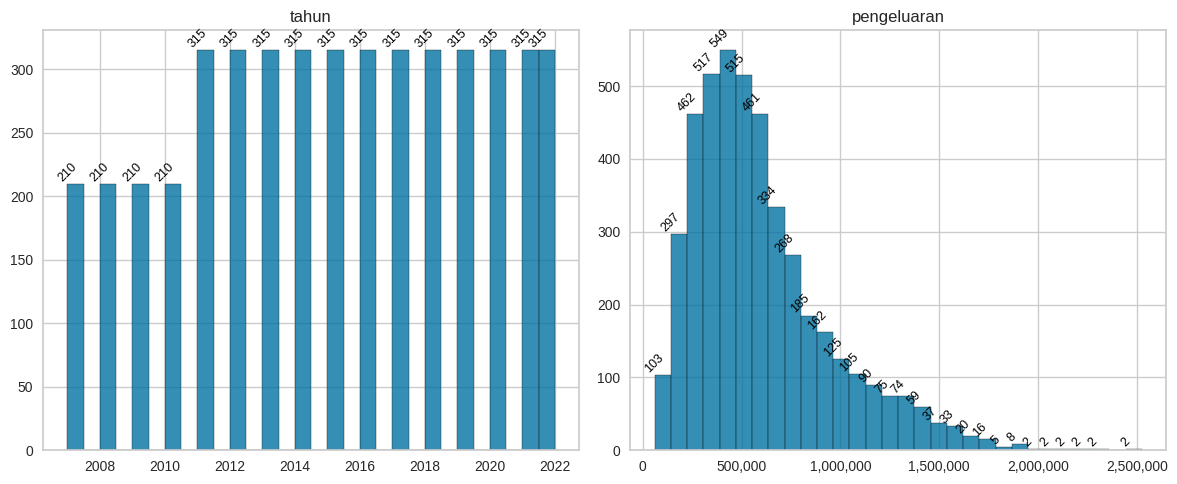

In [6]:
# Visualisasi distribusi numerik
num_cols = df.select_dtypes(include=['number']).columns

# Buat subplot
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(12, 5))

if len(num_cols) == 1:
    axes = [axes]

# Loop untuk membuat histogram setiap kolom numerik
for col, ax in zip(num_cols, axes):
    # Plot histogram
    counts, bins, patches = ax.hist(df[col], bins=30, edgecolor='black', alpha=0.8)

    # Tambahkan angka di atas setiap bar
    for count, bin_edge in zip(counts, bins):
        if count > 0:
            ax.text(bin_edge, count, f'{int(count)}', ha='center', va='bottom', fontsize=9, rotation=45, color='black')

    # Set judul
    ax.set_title(col)

    # Jika kolom adalah pengeluaran, ubah format angka agar lebih mudah dibaca
    if col.lower() == "pengeluaran":
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

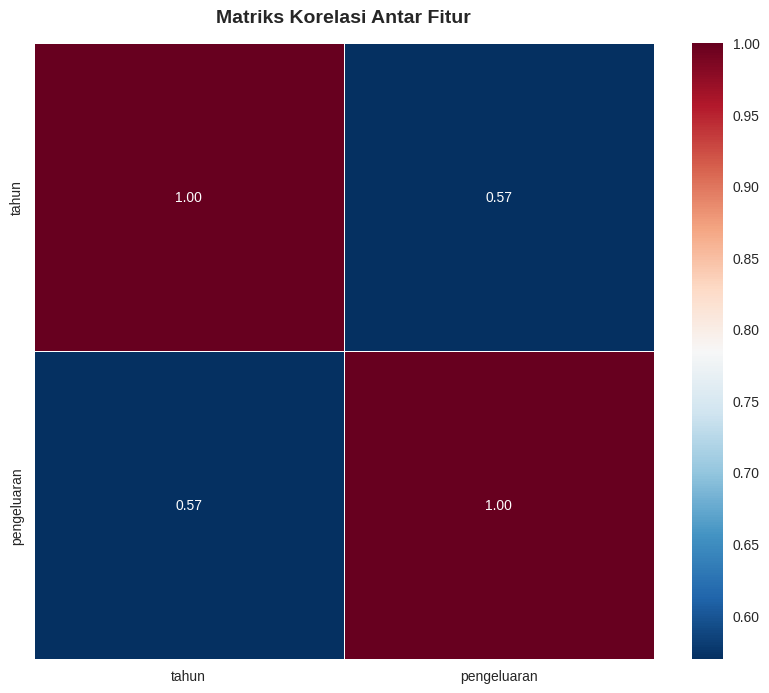

In [7]:
# Buat heatmap korelasi
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='RdBu_r',
    fmt='.2f',
    linewidths=0.5,
    annot_kws={'size': 10},
)

plt.title("Matriks Korelasi Antar Fitur", fontsize=14, fontweight='bold', pad=15)

# Miringkan label sumbu untuk keterbacaan
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

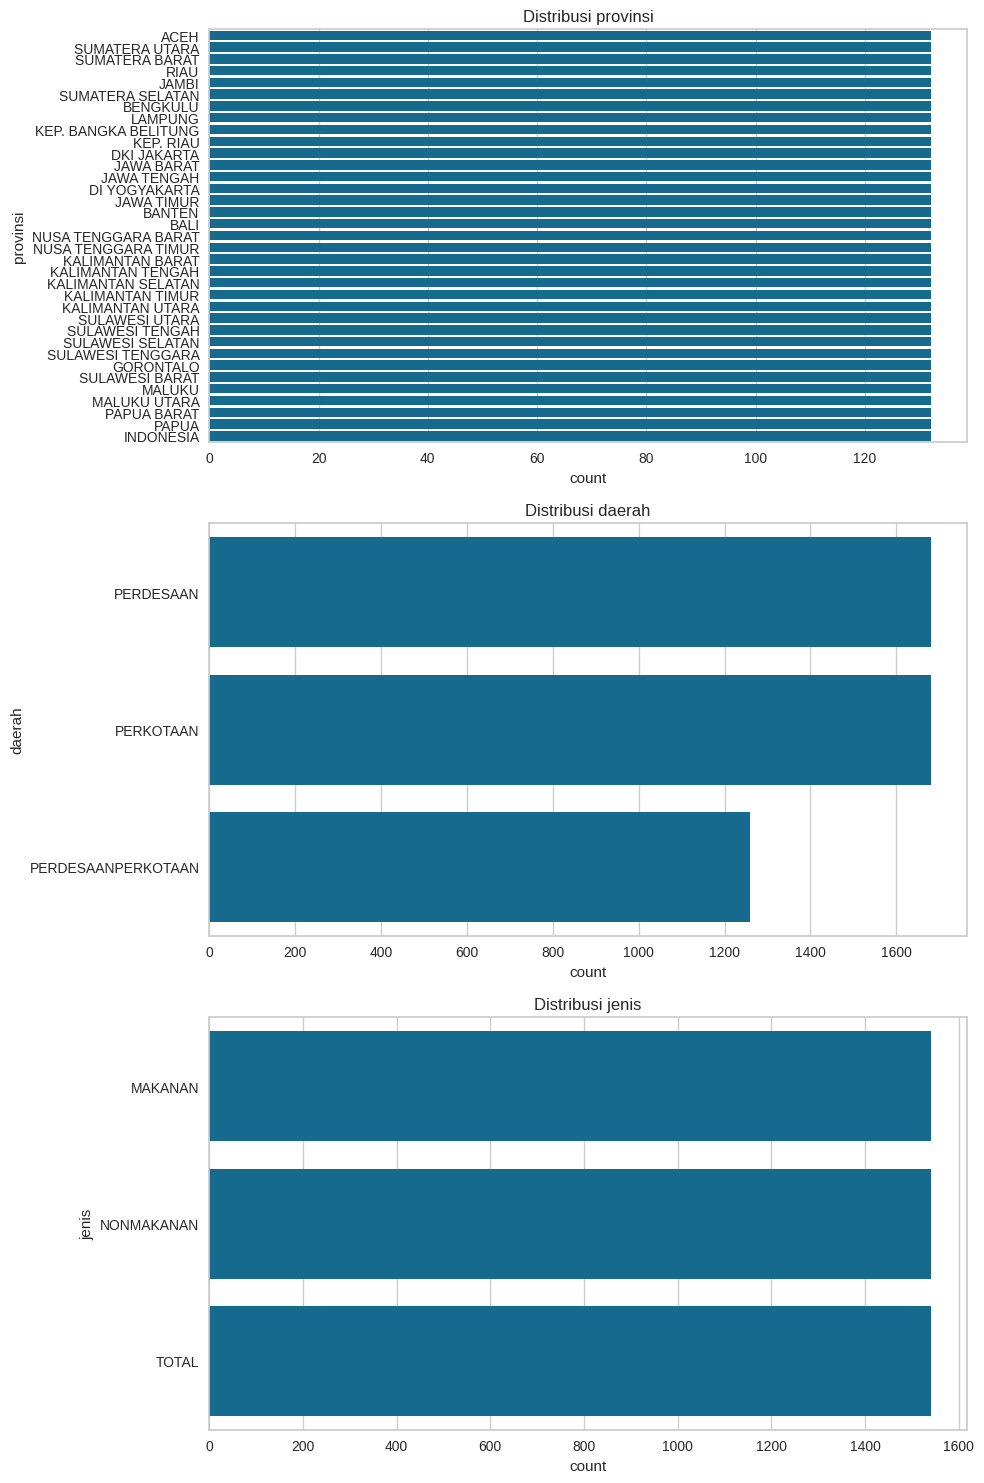

In [8]:
# Visualisasi distribusi variabel kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(10, 5 * len(categorical_cols)))

for i, col in enumerate(categorical_cols):
    sns.countplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Distribusi {col}")

plt.tight_layout()
plt.show()

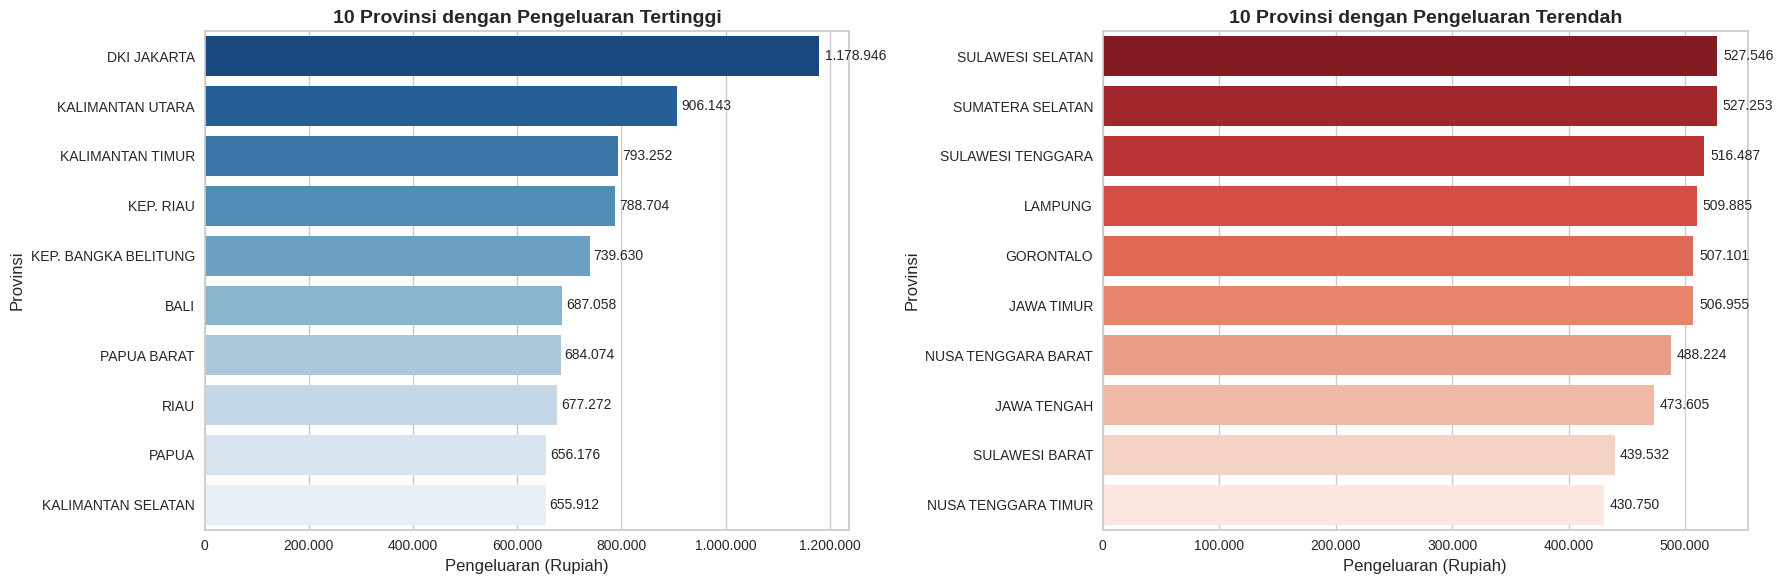

In [9]:
# Calculate average 'pengeluaran' for each 'provinsi'
pengeluaran_provinsi = df.groupby('provinsi')['pengeluaran'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharex=False)

# Top 10 provinsi dengan pengeluaran tertinggi (dengan hue)
sns.barplot(y=pengeluaran_provinsi.head(10).index,
            x=pengeluaran_provinsi.head(10).values,
            ax=axes[0], hue=pengeluaran_provinsi.head(10).index,
            palette="Blues_r", legend=False)  # Menambahkan hue
axes[0].set_title("10 Provinsi dengan Pengeluaran Tertinggi", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Pengeluaran (Rupiah)", fontsize=12)
axes[0].set_ylabel("Provinsi", fontsize=12)
axes[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))

# Tambahkan label angka di atas batang
for i, v in enumerate(pengeluaran_provinsi.head(10).values):
    axes[0].text(v + (v * 0.01), i, f"{int(v):,}".replace(",", "."), va='center', fontsize=10)

# Top 10 provinsi dengan pengeluaran terendah (dengan hue)
sns.barplot(y=pengeluaran_provinsi.tail(10).index,
            x=pengeluaran_provinsi.tail(10).values,
            ax=axes[1], hue=pengeluaran_provinsi.tail(10).index,
            palette="Reds_r", legend=False)  # Menambahkan hue
axes[1].set_title("10 Provinsi dengan Pengeluaran Terendah", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Pengeluaran (Rupiah)", fontsize=12)
axes[1].set_ylabel("Provinsi", fontsize=12)
axes[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))

# Tambahkan label angka di atas batang
for i, v in enumerate(pengeluaran_provinsi.tail(10).values):
    axes[1].text(v + (v * 0.01), i, f"{int(v):,}".replace(",", "."), va='center', fontsize=10)

plt.tight_layout()
plt.show()

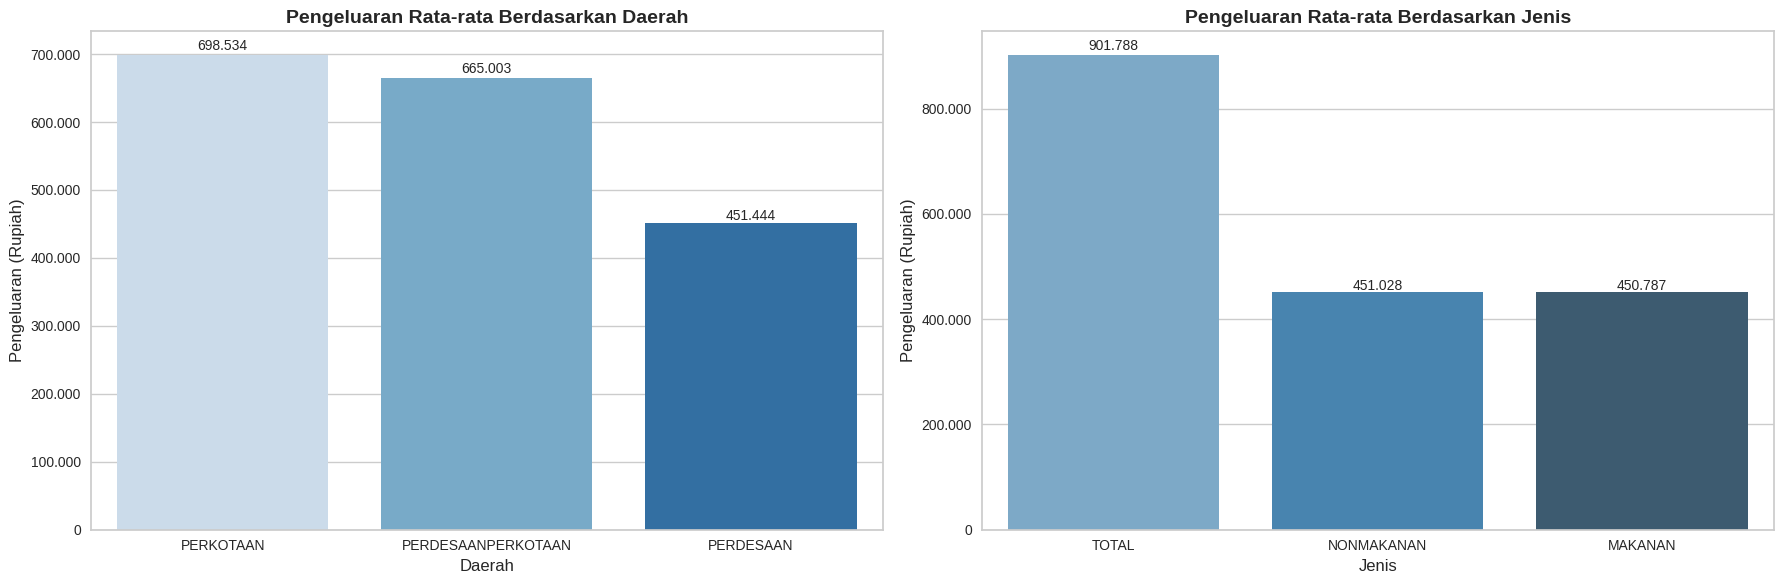

In [10]:
# Calculate average 'pengeluaran' for each 'daerah' and 'jenis'
pengeluaran_daerah = df.groupby('daerah')['pengeluaran'].mean().sort_values(ascending=False)
pengeluaran_jenis = df.groupby('jenis')['pengeluaran'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharex=False)

# Pengeluaran berdasarkan daerah (menggunakan shades of blue)
sns.barplot(x=pengeluaran_daerah.index,
            y=pengeluaran_daerah.values,
            ax=axes[0], hue=pengeluaran_daerah.index, palette="Blues", legend=False)

axes[0].set_title("Pengeluaran Rata-rata Berdasarkan Daerah", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Daerah", fontsize=12)
axes[0].set_ylabel("Pengeluaran (Rupiah)", fontsize=12)
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))

# Tambahkan label angka di atas batang
for i, v in enumerate(pengeluaran_daerah.values):
    axes[0].text(i, v + (v * 0.01), f"{int(v):,}".replace(",", "."), ha='center', fontsize=10)

# Pengeluaran berdasarkan jenis (menggunakan shades of blue)
sns.barplot(x=pengeluaran_jenis.index,
            y=pengeluaran_jenis.values,
            ax=axes[1], hue=pengeluaran_jenis.index, palette="Blues_d", legend=False)

axes[1].set_title("Pengeluaran Rata-rata Berdasarkan Jenis", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Jenis", fontsize=12)
axes[1].set_ylabel("Pengeluaran (Rupiah)", fontsize=12)
axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))

# Tambahkan label angka di atas batang
for i, v in enumerate(pengeluaran_jenis.values):
    axes[1].text(i, v + (v * 0.01), f"{int(v):,}".replace(",", "."), ha='center', fontsize=10)

# Atur tampilan lebih rapi
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [11]:
print(df['provinsi'].unique())  # Melihat daftar unik dalam kolom provinsi
print(df[df['provinsi'] == 'INDONESIA'])  # Melihat data yang memiliki 'INDONESIA'

['ACEH' 'SUMATERA UTARA' 'SUMATERA BARAT' 'RIAU' 'JAMBI'
 'SUMATERA SELATAN' 'BENGKULU' 'LAMPUNG' 'KEP. BANGKA BELITUNG'
 'KEP. RIAU' 'DKI JAKARTA' 'JAWA BARAT' 'JAWA TENGAH' 'DI YOGYAKARTA'
 'JAWA TIMUR' 'BANTEN' 'BALI' 'NUSA TENGGARA BARAT' 'NUSA TENGGARA TIMUR'
 'KALIMANTAN BARAT' 'KALIMANTAN TENGAH' 'KALIMANTAN SELATAN'
 'KALIMANTAN TIMUR' 'KALIMANTAN UTARA' 'SULAWESI UTARA' 'SULAWESI TENGAH'
 'SULAWESI SELATAN' 'SULAWESI TENGGARA' 'GORONTALO' 'SULAWESI BARAT'
 'MALUKU' 'MALUKU UTARA' 'PAPUA BARAT' 'PAPUA' 'INDONESIA']
       provinsi              daerah    jenis  tahun  pengeluaran
4488  INDONESIA           PERDESAAN  MAKANAN   2007     148613.0
4489  INDONESIA           PERDESAAN  MAKANAN   2008     166583.0
4490  INDONESIA           PERDESAAN  MAKANAN   2009     186741.0
4491  INDONESIA           PERDESAAN  MAKANAN   2010     219803.0
4492  INDONESIA           PERDESAAN  MAKANAN   2011     254926.0
...         ...                 ...      ...    ...          ...
4615  INDONESIA 

In [12]:
df = df[df['provinsi'] != 'INDONESIA']

In [13]:
# Mengisi missing values dengan median
df['pengeluaran'] = df['pengeluaran'].fillna(df['pengeluaran'].median())

# Mengecek missing values
display(df.isnull().sum())

,0
provinsi,0
daerah,0
jenis,0
tahun,0
pengeluaran,0


In [14]:
# Mengecek data duplikat
df.duplicated().sum()
df[df.duplicated()]

,provinsi,daerah,jenis,tahun,pengeluaran


In [15]:
# Menggunakan StandardScaler untuk normalisasi z-score
# Define numerical_cols
numerical_cols = df.select_dtypes(include=['number']).columns

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(
    df[numerical_cols]
)

# Menampilkan 5 data pertama setelah normalisasi
print("\nData setelah normalisasi:")
print(df.head())


Data setelah normalisasi:
  provinsi     daerah    jenis     tahun  pengeluaran
0     ACEH  PERDESAAN  MAKANAN -1.822033    -1.159356
1     ACEH  PERDESAAN  MAKANAN -1.595566    -1.091759
2     ACEH  PERDESAAN  MAKANAN -1.369098    -1.009726
3     ACEH  PERDESAAN  MAKANAN -1.142631    -0.928621
4     ACEH  PERDESAAN  MAKANAN -0.916164    -0.836265


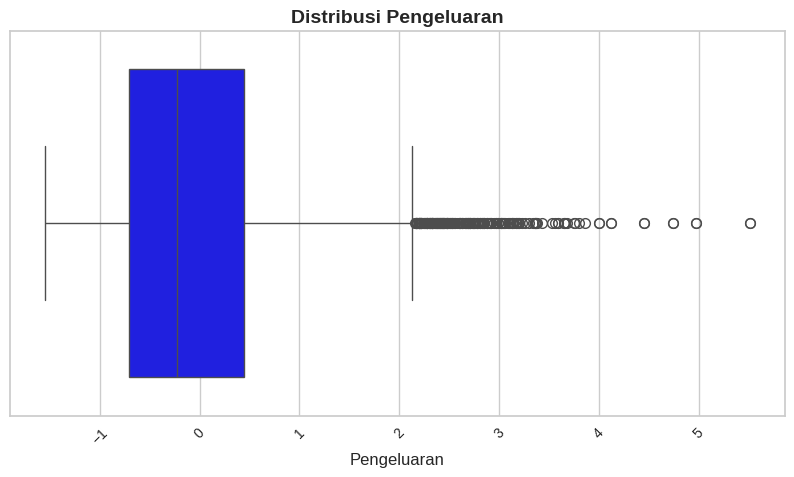

In [16]:
# Visualisasi distribusi pengeluaran dengan boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['pengeluaran'], color='blue')

# Format angka pada sumbu x agar tidak dalam notasi ilmiah
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel("Pengeluaran", fontsize=12)
plt.title("Distribusi Pengeluaran", fontsize=14, fontweight='bold')

plt.show()

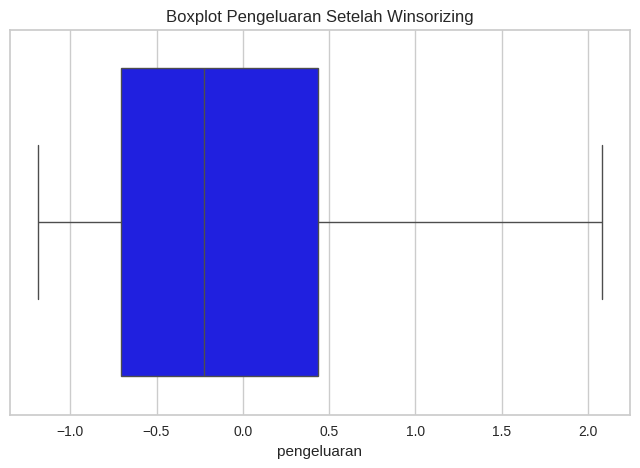

In [17]:
from scipy.stats.mstats import winsorize

# Winsorizing: Batasi nilai ekstrem (5% di bawah & atas)
df['pengeluaran'] = winsorize(df['pengeluaran'], limits=[0.05, 0.05])

# Plot ulang distribusi setelah Winsorizing
plt.figure(figsize=(8, 5))
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df['pengeluaran'], color="blue")
plt.title("Boxplot Pengeluaran Setelah Winsorizing")
plt.show()

In [18]:
# Inisialisasi dictionary untuk menyimpan encoder
encoders = {}

# Label Encoding untuk kolom kategorikal
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Membuat salinan dataframe hasil preprocessing
df_normalized = df.copy()

In [19]:
# Membuat kategori pengeluaran dengan binning
bins = [df["pengeluaran"].min(),
        df["pengeluaran"].quantile(0.25),  # Q1
        df["pengeluaran"].quantile(0.50),  # Median (Q2)
        df["pengeluaran"].quantile(0.75),  # Q3
        df["pengeluaran"].max() + 1]

labels = ["Rendah", "Sedang", "Tinggi", "Sangat Tinggi"]

# Proses binning menggunakan pd.cut()
df_normalized['pengeluaran_kategori'] = pd.cut(
    df_normalized['pengeluaran'],
    bins=bins,
    labels=labels,
    right=False  # Interval [awal, akhir)
)

# Encoding kategori pengeluaran
label_encoder_kategori = LabelEncoder()
df_normalized['pengeluaran_kategori'] = label_encoder_kategori.fit_transform(
    df_normalized['pengeluaran_kategori']
)

# Menampilkan hasil akhir
print("\nData setelah binning pengeluaran:")
print(df_normalized)


Data setelah binning pengeluaran:
      provinsi  daerah  jenis     tahun  pengeluaran  pengeluaran_kategori
0            0       0      0 -1.822033    -1.159356                     0
1            0       0      0 -1.595566    -1.091759                     0
2            0       0      0 -1.369098    -1.009726                     0
3            0       0      0 -1.142631    -0.928621                     0
4            0       0      0 -0.916164    -0.836265                     0
...        ...     ...    ...       ...          ...                   ...
4483        23       1      2  0.669108     1.502484                     1
4484        23       1      2  0.895576     1.760280                     1
4485        23       1      2  1.122043     2.032318                     1
4486        23       1      2  1.348510     2.081616                     1
4487        23       1      2  1.574978     2.081616                     1

[4488 rows x 6 columns]


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [20]:
X = df_normalized[['tahun', 'pengeluaran']].values

print(pd.DataFrame(X, columns=['tahun', 'pengeluaran']))

kmeans_model = KMeans(n_clusters=3, random_state=0)
kmeans_model.fit(X)
labels = kmeans_model.labels_

         tahun  pengeluaran
0    -1.822033    -1.159356
1    -1.595566    -1.091759
2    -1.369098    -1.009726
3    -1.142631    -0.928621
4    -0.916164    -0.836265
...        ...          ...
4483  0.669108     1.502484
4484  0.895576     1.760280
4485  1.122043     2.032318
4486  1.348510     2.081616
4487  1.574978     2.081616

[4488 rows x 2 columns]


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

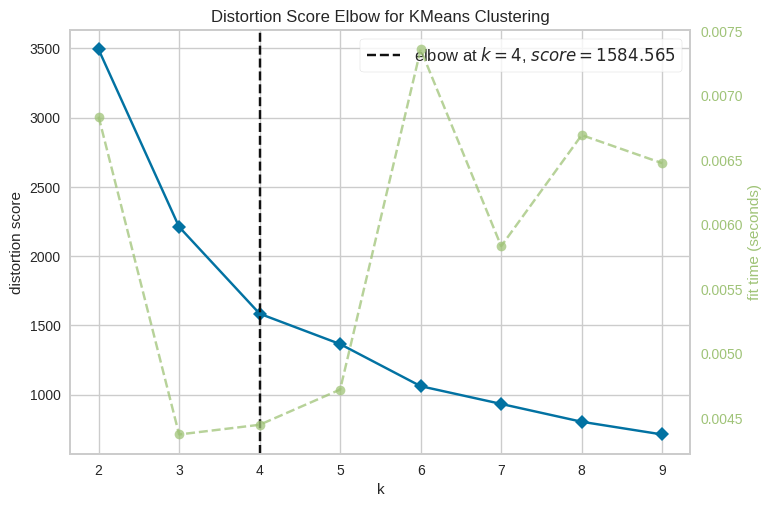

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
kmeans_elbow = KMeans(random_state=0)
visualizer = KElbowVisualizer(
    kmeans_elbow,
    k=(2, 10)
)
visualizer.fit(X)
optimal_k_elbow = visualizer.elbow_value_

visualizer.show()

Silhouette Score untuk k=2: 0.477
Silhouette Score untuk k=3: 0.453
Silhouette Score untuk k=4: 0.412
Silhouette Score untuk k=5: 0.364
Silhouette Score untuk k=6: 0.388
Silhouette Score untuk k=7: 0.368
Silhouette Score untuk k=8: 0.381
Silhouette Score untuk k=9: 0.381


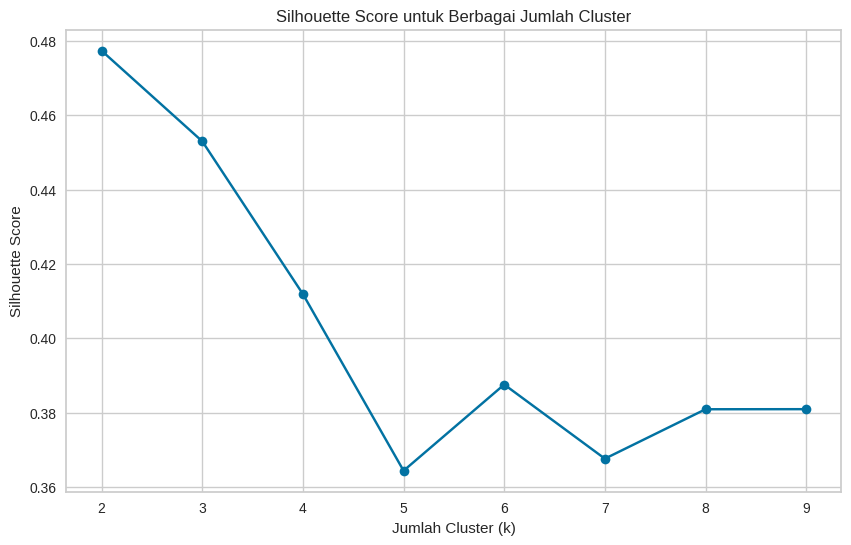

In [22]:
silhouette_scores = []
max_silhouette_score = -float('inf')

for k in range(2, 10):
    kmeans_temp = KMeans(n_clusters=k, random_state=0)
    labels_temp = kmeans_temp.fit_predict(X)
    score = silhouette_score(X, labels_temp)
    silhouette_scores.append(score)

    print(f"Silhouette Score untuk k={k}: {score:.3f}")

    if score > max_silhouette_score:
        max_silhouette_score = score

# Visualisasi Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Score untuk Berbagai Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

optimal_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2

In [23]:
print("\nRekomendasi Jumlah Cluster:")
print(f"- Berdasarkan Elbow Method: {optimal_k_elbow} cluster")
print(f"- Berdasarkan Silhouette Score: {optimal_k_silhouette} cluster")


Rekomendasi Jumlah Cluster:
- Berdasarkan Elbow Method: 4 cluster
- Berdasarkan Silhouette Score: 2 cluster


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [24]:
# Mengambil semua fitur dari dataset yang sudah dinormalisasi
features = df_normalized.columns

X_full = df_normalized[features].values

pca = PCA(
    n_components=0.95,
    random_state=0
)
X_pca = pca.fit_transform(X_full)

print(f"\nJumlah fitur asli: {X_full.shape[1]}, setelah PCA: {X_pca.shape[1]}")


Jumlah fitur asli: 6, setelah PCA: 1


In [25]:
# Inisialisasi model KMeans dengan jumlah cluster optimal dari Elbow Method
kmeans_pca = KMeans(
    n_clusters=optimal_k_elbow,
    random_state=0
)

kmeans_pca.fit(X_pca)

labels_pca = kmeans_pca.labels_

In [26]:
# Menghitung Silhouette Score untuk model dengan data hasil PCA
score_pca = silhouette_score(X_pca, labels_pca)
print(f"Silhouette Score dengan feature selection (PCA): {score_pca:.3f}")

# Membandingkan dengan performa model asli (tanpa PCA)
score_original = max_silhouette_score  # Silhouette Score model asli
print(f"Silhouette Score model asli: {score_original:.3f}")

Silhouette Score dengan feature selection (PCA): 0.577
Silhouette Score model asli: 0.477


In [27]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_pca)

score_dbscan = silhouette_score(X_pca, labels_dbscan)
print(f"Silhouette Score dengan DBSCAN: {score_dbscan:.3f}")

Silhouette Score dengan DBSCAN: 0.993


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

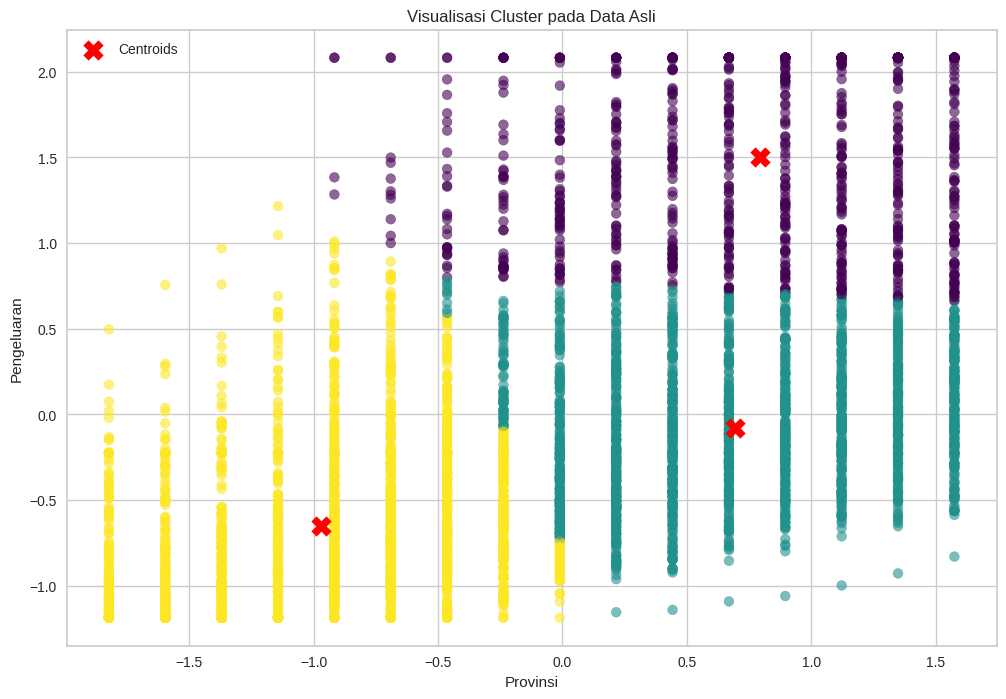

In [37]:
# Menampilkan hasil clustering dalam bentuk visualisasi
plt.figure(figsize=(12, 8))

plt.scatter(
    X[:, 0],
    X[:, 1],
    c=labels,
    cmap='viridis',
    s=50,
    alpha=0.6
)

centroids = kmeans_model.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='red',
    s=200,
    marker='X',
    label='Centroids'
)

plt.title('Visualisasi Cluster pada Data Asli')
plt.xlabel('Provinsi')
plt.ylabel('Pengeluaran')
plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [29]:
# 1. Tambahkan Hasil Label Cluster ke DataFrame
df_normalized['cluster'] = kmeans_model.labels_

df_original = df_normalized.copy()

In [30]:
# Inverse transform untuk data numerik (misalnya, 'tahun' dan 'pengeluaran')
df_original[['tahun', 'pengeluaran']] = scaler.inverse_transform(df_normalized[['tahun', 'pengeluaran']])

for col in categorical_cols:
    # Pastikan kolom yang di-inverse transform hanya yang asli, bukan kolom hasil clustering
    df_original[col] = encoders[col].inverse_transform(df_normalized[col])

df_original['pengeluaran_kategori'] = label_encoder_kategori.inverse_transform(df_normalized['pengeluaran_kategori'])

In [31]:
print("Data asli setelah inverse transform:")
print(df_original.head())

Data asli setelah inverse transform:
  provinsi     daerah    jenis   tahun  pengeluaran pengeluaran_kategori  \
0     ACEH  PERDESAAN  MAKANAN  2007.0     195176.0               Rendah   
1     ACEH  PERDESAAN  MAKANAN  2008.0     218781.0               Rendah   
2     ACEH  PERDESAAN  MAKANAN  2009.0     247427.0               Rendah   
3     ACEH  PERDESAAN  MAKANAN  2010.0     275749.0               Rendah   
4     ACEH  PERDESAAN  MAKANAN  2011.0     308000.0               Rendah   

   cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [32]:
df_original[['tahun', 'pengeluaran']] = scaler.inverse_transform(df_normalized[['tahun', 'pengeluaran']])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [33]:
# Mengelompokkan data berdasarkan kolom 'cluster' dan menghitung statistik deskriptif
# untuk fitur 'tahun' dan 'pengeluaran'
cluster_stats = df_original.groupby('cluster')[['tahun', 'pengeluaran']].agg(
    ['mean', 'median', 'std']  # Menghitung mean, median, dan standar deviasi
)

# Menampilkan hasil statistik deskriptif
print("Statistik Deskriptif per Cluster:")
print(cluster_stats)

Statistik Deskriptif per Cluster:
               tahun                     pengeluaran                          
                mean  median       std          mean     median            std
cluster                                                                       
0        2018.550656  2019.0  2.715552  1.126565e+06  1126689.0  168364.574440
1        2018.114983  2018.0  2.384488  5.731424e+05   568630.5  139688.525486
2        2010.776336  2011.0  2.265892  3.729843e+05   336764.0  162133.990935


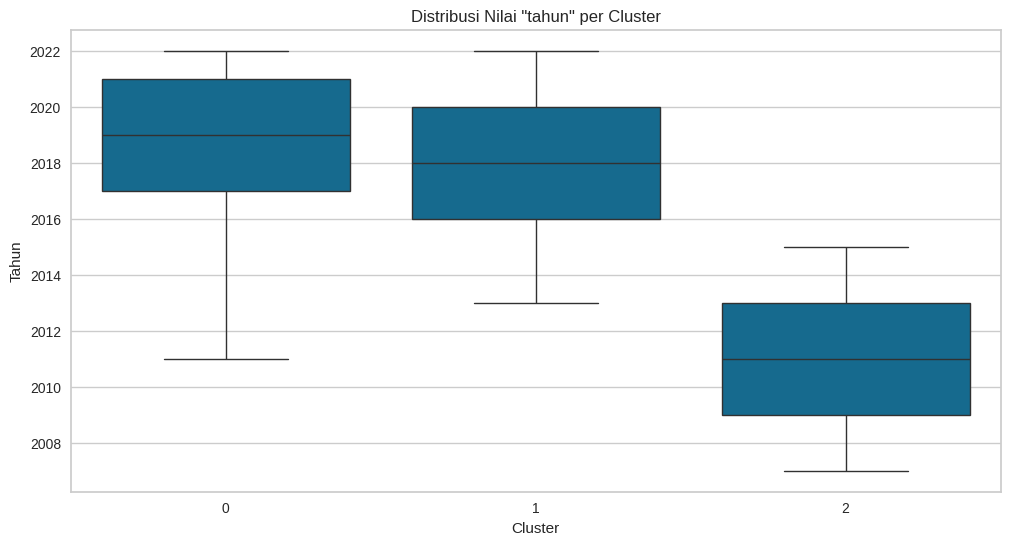

In [34]:
# Membuat boxplot untuk melihat distribusi nilai 'tahun' di setiap cluster
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='cluster',
    y='tahun',
    data=df_original
)
plt.title('Distribusi Nilai "tahun" per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Tahun')
plt.show()

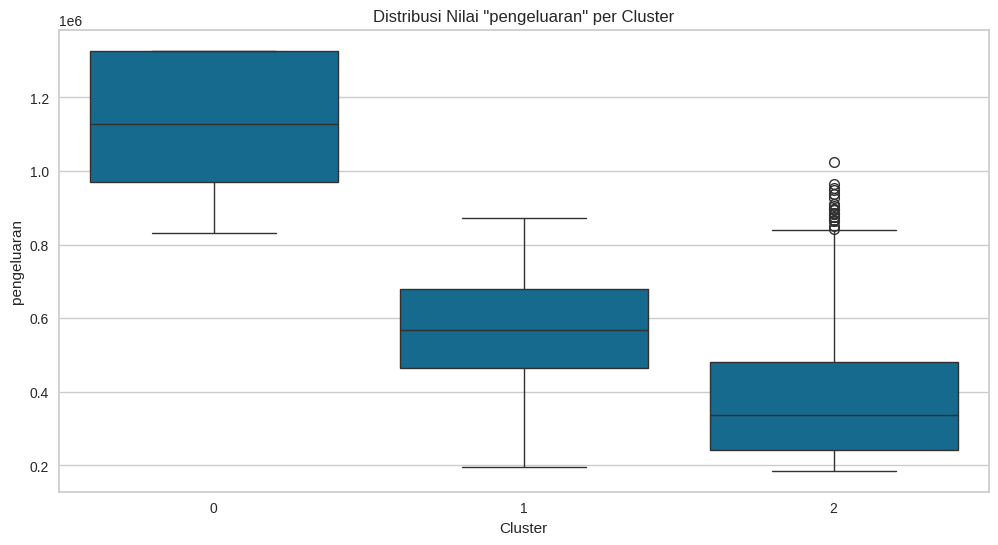

In [35]:
# Membuat boxplot untuk melihat distribusi nilai 'pengeluaran' di setiap cluster
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='cluster',
    y='pengeluaran',
    data=df_original
)
plt.title('Distribusi Nilai "pengeluaran" per Cluster')
plt.xlabel('Cluster')
plt.ylabel('pengeluaran')
plt.show()

Tulis hasil interpretasinya di sini.
1. Cluster 1:
- Rata-rata tahun: 2019
- Rata-rata Pengeluaran: 1.126.689
- Analisis: Cluster ini mencakup kelompok dengan tingkat pengeluaran tertinggi dibandingkan cluster lainnya. Kemungkinan besar, individu atau rumah tangga dalam cluster ini memiliki daya beli tinggi dan cenderung mengalokasikan lebih banyak dana untuk kebutuhan mereka.

2. Cluster 2:
- Rata-rata tahun: 2018
- Rata-rata Pengeluaran: 568.630
- Analisis: Cluster ini terdiri dari individu atau rumah tangga dengan tingkat pengeluaran menengah. Mereka memiliki daya beli yang cukup baik tetapi tidak sebesar kelompok di Cluster 1.

3. Cluster 3:
- Rata-rata tahun: 2011
- Rata-rata Pengeluaran: 336.764
- Analisis: Cluster ini memiliki rata-rata pengeluaran terendah, yang menunjukkan bahwa individu atau rumah tangga dalam kelompok ini lebih hemat atau memiliki daya beli yang lebih terbatas dibandingkan cluster lainnya.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [36]:
df_original.to_csv('Dataset_klasifikasi.csv', index=False)
print("Data telah diekspor ke 'Dataset_klasifikasi.csv'")

Data telah diekspor ke 'Dataset_klasifikasi.csv'
